Dataset

Athlete: https://drive.google.com/file/d/1y6e0eNKfyo9ILqQHszcrRuv3uQhIMm_z/view


NOC: https://drive.google.com/file/d/1_zGhADzXEA9mFHvuCvpllXMCN2DUE2tH/view

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

# Reading the Dataset


In [ ]:
athlete = pd.read_csv("/content/drive/MyDrive/project 4 csv file/athlete_events.csv")
noc = pd.read_csv("/content/drive/MyDrive/project 4 csv file/noc_regions.csv")

#  Creating copy of Dataframe

In [ ]:
ath = athlete.copy()
cou = noc.copy()

# Data Exploration

In [ ]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
ath.tail()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [ ]:
ath.shape

(271116, 15)

In [ ]:
cou.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
cou.shape

(230, 3)

In [ ]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
cou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [ ]:
# checking null values
ath.isnull().sum()

ID             0
Name           0
Gender         0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [ ]:
# Find out the ratio of null & not null values in the medal column
x = ath['Medal'].isnull().sum()
y = ath['Medal'].notnull().sum()
print(x,":",y)

231333 : 39783


# Data Cleaning & Data Manipulation

* Find all the rows (Datapoints) in the NOC dataframe where region is NaN

In [ ]:
cou

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [ ]:
cou[cou['region'].isnull()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


In [ ]:
# Show all the rows from the athlete DataFrame where the region is ROT, TUV & UNK
ath.loc[ath['NOC'].isin(['ROT','TUV','UNK'])]

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
6267,3515,Paulo Amotun Lokoro,M,24.0,170.0,61.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN
7908,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,NaN
7909,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,NaN
21529,11364,Yiech Pur Biel,M,21.0,178.0,62.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,NaN
31708,16287,Mabika Yolande Bukasa,F,28.0,170.0,70.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,NaN
40238,20693,James Nyang Chiengjiek,M,24.0,179.0,59.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,NaN
61080,31292,Fritz Eccard,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN
64674,33094,Logona Esau,M,21.0,163.0,69.0,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Lightweight,NaN
119392,60444,Yonas Kinde,M,36.0,172.0,57.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,NaN
130721,65813,A. Laffen,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN


* Add a column "Region" to the ath DataFrame. And the region column should have the region according to the elements in the NOC column of the countries DataFrame.

In [ ]:
ath.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
cou.columns

Index(['NOC', 'region', 'notes'], dtype='object')

In [ ]:
cou.set_index('NOC')

,region,notes
NOC,,
AFG,Afghanistan,NaN
AHO,Curacao,Netherlands Antilles
ALB,Albania,NaN
ALG,Algeria,NaN
AND,Andorra,NaN
...,...,...
YEM,Yemen,NaN
YMD,Yemen,South Yemen
YUG,Serbia,Yugoslavia


In [ ]:
region = ath['NOC'].map(cou.set_index('NOC')['region'])

In [ ]:
region

0               China
1               China
2             Denmark
3             Denmark
4         Netherlands
             ...     
271111         Poland
271112         Poland
271113         Poland
271114         Poland
271115         Poland
Name: NOC, Length: 271116, dtype: object

In [ ]:
ath.insert(7,'Region',region)

In [ ]:
ath.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'Region',
       'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
# Delete the NOC column from the ath DataFrame
ath.drop('NOC', axis= 1, inplace = True)

In [ ]:
ath.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'Region',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
ath.head(1)

,ID,Name,Gender,Age,Height,Weight,Team,Region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


Handling the null values in the columns - Age, Height, Weight (From ath DataFrame)

In [ ]:
# find the minimum with each other
ath.Age.min()

10.0

In [ ]:
ath.Age.max()

97.0

In [ ]:
ath.Age.describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [ ]:
ath.Age.isna().sum()

9474

In [ ]:
# Fill all the NaN values with the mean value of the Age column
ath["Age"].fillna(ath.Age.mean(),inplace = True)

In [ ]:
ath.Age

0         24.0
1         23.0
2         24.0
3         34.0
4         21.0
          ... 
271111    29.0
271112    27.0
271113    27.0
271114    30.0
271115    34.0
Name: Age, Length: 271116, dtype: float64

In [ ]:
# Changing dtype of age to int from float
ath.Age = ath.Age.astype(int)

In [ ]:
ath.Age

0         24
1         23
2         24
3         34
4         21
          ..
271111    29
271112    27
271113    27
271114    30
271115    34
Name: Age, Length: 271116, dtype: int64

In [ ]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  int64  
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   Region  270746 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 31.0+ MB


In [ ]:
# dealing with height column and Weight column
ath.Height.describe()

count    210945.000000
mean        175.338970
std          10.518462
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Height, dtype: float64

In [ ]:
ath.Weight.describe()

count    208241.000000
mean         70.702393
std          14.348020
min          25.000000
25%          60.000000
50%          70.000000
75%          79.000000
max         214.000000
Name: Weight, dtype: float64

In [ ]:
# fill null values of height and weight column with its corresponding mean value
ath['Height'].fillna(ath.Height.mean(),inplace = True)
ath['Weight'].fillna(ath.Weight.mean(),inplace = True)

In [ ]:
# changing datatype
ath.Height = ath.Height.astype('float')
ath.Weight = ath.Weight.astype('float')

In [ ]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  int64  
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   Region  270746 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 31.0+ MB


List out all the values of the region columns where the values are null

In [ ]:
ath[ath['Region'].isna()]

,ID,Name,Gender,Age,Height,Weight,Team,Region,Games,Year,Season,City,Sport,Event,Medal
578,332,Zarinah Abdullah,F,21,175.33897,70.702393,Singapore,NaN,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN
579,332,Zarinah Abdullah,F,25,175.33897,70.702393,Singapore,NaN,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28,173.00000,68.000000,Singapore,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN
6267,3515,Paulo Amotun Lokoro,M,24,170.00000,61.000000,Refugee Olympic Athletes,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN
7659,4264,Ang Peng Siong,M,21,180.00000,75.000000,Singapore,NaN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268752,134454,Zhang Guirong,F,26,182.00000,95.000000,Singapore,NaN,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Shot Put,NaN
268753,134454,Zhang Guirong,F,30,182.00000,95.000000,Singapore,NaN,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,NaN
268993,134587,Zhang Xueling,F,21,163.00000,53.000000,Singapore,NaN,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Singles,NaN
268994,134587,Zhang Xueling,F,21,163.00000,53.000000,Singapore-1,NaN,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Doubles,NaN


In [ ]:
for team in ath[ath['Region'].isna()]['Team']:
  print(team)

Singapore
Singapore
Singapore
Refugee Olympic Athletes
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Refugee Olympic Athletes
Refugee Olympic Athletes
Refugee Olympic Athletes
Singapore
Singapore
Singapore
Singapore
Refugee Olympic Athletes
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Refugee Olympic Athletes
Singapore
Singapore
Singapore
Singapore
June Climene
Singapore
Singapore
Singapore
Singapore
Singapore
June Climene
Unknown
Tuvalu
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Rika II
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Rika II
Singapore
Rika II
June Climene
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore-2
Rika II
Si

In [ ]:
# fill null values of column region with the values of team columns
ath.Region.fillna("Team",inplace = True)


In [ ]:
ath.isna().sum()

ID             0
Name           0
Gender         0
Age            0
Height         0
Weight         0
Team           0
Region         0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [ ]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  int64  
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   Region  271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 31.0+ MB


# Handling the Null values of column 'Medals'

In [ ]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,Region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.00000,80.000000,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23,170.00000,60.000000,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24,175.33897,70.702393,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34,175.33897,70.702393,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185.00000,82.000000,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
# find how many type of values are in medal column
ath.Medal.unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [ ]:
ath.Medal.nunique()

3

In [ ]:
ath.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [ ]:
# Replace
# NaN -> 0
# Gold -> 1
# Silver -> 2
# Bronze -> 3

In [ ]:
ath.Medal.replace([np.nan, 'Gold', 'Silver', 'Bronze'],[0, 1, 2, 3], inplace=True)

In [ ]:
ath.Medal

0         0
1         0
2         0
3         1
4         0
         ..
271111    0
271112    0
271113    0
271114    0
271115    0
Name: Medal, Length: 271116, dtype: int64

In [ ]:
ath.Medal.value_counts()

0    231333
1     13372
3     13295
2     13116
Name: Medal, dtype: int64

In [ ]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  int64  
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   Region  271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 31.0+ MB


In [ ]:
ath.isna().sum()

ID        0
Name      0
Gender    0
Age       0
Height    0
Weight    0
Team      0
Region    0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

Delete some of the unwanted/irrelavant columns

In [ ]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,Region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.00000,80.000000,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23,170.00000,60.000000,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24,175.33897,70.702393,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34,175.33897,70.702393,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21,185.00000,82.000000,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


In [ ]:
# Delete the columns - ID, Region, Games
ath.drop(['ID' , 'Region' , 'Games'],axis = 1,inplace = True)

In [ ]:
ath.head(2)

,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,A Lamusi,M,23,170.0,60.0,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0


Remove the unwanted phrases from the "Event" Column

In [ ]:
ath[['Sport' , 'Event']]

,Sport,Event
0,Basketball,Basketball Men's Basketball
1,Judo,Judo Men's Extra-Lightweight
2,Football,Football Men's Football
3,Tug-Of-War,Tug-Of-War Men's Tug-Of-War
4,Speed Skating,Speed Skating Women's 500 metres
...,...,...
271111,Luge,Luge Mixed (Men)'s Doubles
271112,Ski Jumping,"Ski Jumping Men's Large Hill, Individual"
271113,Ski Jumping,"Ski Jumping Men's Large Hill, Team"
271114,Bobsleigh,Bobsleigh Men's Four


In [ ]:
for i,j in zip(ath.Sport, range(len(ath.Event))):
  ath.Event[j] = re.sub(f'^{i}\s','',ath.Event[j])

<ipython-input-59-aec91bef2de0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ath.Event[j] = re.sub(f'^{i}\s','',ath.Event[j])


In [ ]:
ath.head()

,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24,180.00000,80.000000,China,1992,Summer,Barcelona,Basketball,Men's Basketball,0
1,A Lamusi,M,23,170.00000,60.000000,China,2012,Summer,London,Judo,Men's Extra-Lightweight,0
2,Gunnar Nielsen Aaby,M,24,175.33897,70.702393,Denmark,1920,Summer,Antwerpen,Football,Men's Football,0
3,Edgar Lindenau Aabye,M,34,175.33897,70.702393,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Men's Tug-Of-War,1
4,Christine Jacoba Aaftink,F,21,185.00000,82.000000,Netherlands,1988,Winter,Calgary,Speed Skating,Women's 500 metres,0


In [ ]:
ath.shape

(271116, 12)

In [ ]:
ath.duplicated().sum()

1385

In [ ]:
ath[ath.duplicated()]

,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
1252,Dsir Antoine Acket,M,27,175.33897,70.702393,Belgium,1932,Summer,Los Angeles,Art Competitions,"Mixed Painting, Unknown Event",0
4282,William Truman Aldrich,M,48,175.33897,70.702393,United States,1928,Summer,Amsterdam,Art Competitions,"Mixed Painting, Drawings And Water Colors",0
4283,William Truman Aldrich,M,48,175.33897,70.702393,United States,1928,Summer,Amsterdam,Art Competitions,"Mixed Painting, Drawings And Water Colors",0
4862,Hermann Reinhard Alker,M,43,175.33897,70.702393,Germany,1928,Summer,Amsterdam,Art Competitions,"Mixed Architecture, Designs For Town Planning",0
4864,Hermann Reinhard Alker,M,43,175.33897,70.702393,Germany,1928,Summer,Amsterdam,Art Competitions,"Mixed Architecture, Architectural Designs",0
...,...,...,...,...,...,...,...,...,...,...,...,...
269994,Anna Katrina Zinkeisen (-Heseltine),F,46,175.33897,70.702393,Great Britain,1948,Summer,London,Art Competitions,"Mixed Painting, Paintings",0
269995,Anna Katrina Zinkeisen (-Heseltine),F,46,175.33897,70.702393,Great Britain,1948,Summer,London,Art Competitions,"Mixed Painting, Paintings",0
269997,Anna Katrina Zinkeisen (-Heseltine),F,46,175.33897,70.702393,Great Britain,1948,Summer,London,Art Competitions,"Mixed Painting, Unknown Event",0
269999,Doris Clare Zinkeisen (-Johnstone),F,49,175.33897,70.702393,Great Britain,1948,Summer,London,Art Competitions,"Mixed Painting, Unknown Event",0


In [ ]:
ath.loc[ath['Name']== 'Henri Achille Zo']

,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
270199,Henri Achille Zo,M,58,175.33897,70.702393,France,1932,Summer,Los Angeles,Art Competitions,"Mixed Painting, Unknown Event",0
270200,Henri Achille Zo,M,58,175.33897,70.702393,France,1932,Summer,Los Angeles,Art Competitions,"Mixed Painting, Unknown Event",0


In [ ]:
ath.drop_duplicates(inplace = True)

In [ ]:
ath.reset_index(inplace = True)

In [ ]:
ath.duplicated().sum()

0

In [ ]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269731 entries, 0 to 269730
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   index   269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Gender  269731 non-null  object 
 3   Age     269731 non-null  int64  
 4   Height  269731 non-null  float64
 5   Weight  269731 non-null  float64
 6   Team    269731 non-null  object 
 7   Year    269731 non-null  int64  
 8   Season  269731 non-null  object 
 9   City    269731 non-null  object 
 10  Sport   269731 non-null  object 
 11  Event   269731 non-null  object 
 12  Medal   269731 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 26.8+ MB


In [ ]:

ath.drop('index',axis = 1, inplace = True)

In [ ]:
ath.head(2)

,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Men's Basketball,0
1,A Lamusi,M,23,170.0,60.0,China,2012,Summer,London,Judo,Men's Extra-Lightweight,0


# Data Exportation

In [ ]:
# Export to JSON
ath.to_json('Olympics_dataset.json')

# Export to Excel
ath.to_excel('Olympics_dataset.xlsx')

# Export to CSV
ath.to_csv('Olympics_dataset.csv')

In [ ]:
!pwd   # it will export to drive or current local storage

/content


# Data Analysis

1. Show the relationship b/w Height & Weight

Text(0.5, 1.0, 'Height vs Weight')

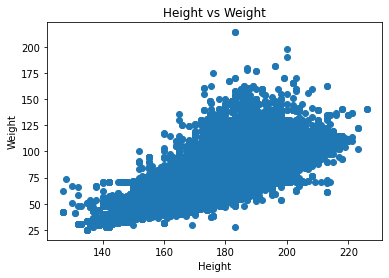

In [ ]:

plt.scatter(ath.Height, ath.Weight)

plt.xlabel('Height')
plt.ylabel('Weight', fontsize =10)
plt.title('Height vs Weight', loc = 'center')

2. Find out how many Male & Female has participated in the Olympics w.r.t. the given dataset (Data Visulisation)

In [ ]:
ath['Gender'].value_counts()

M    195353
F     74378
Name: Gender, dtype: int64

Text(0.5, 1.0, 'no. of males and females')

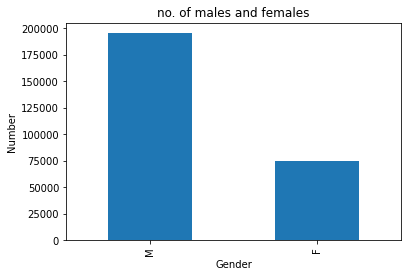

In [ ]:
ath['Gender'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = [6.4, 4.8]
plt.xlabel('Gender')
plt.ylabel('Number')
plt.title('no. of males and females')

3. How many Male and Female have participated in the Summer & Winter Olympics

In [ ]:
a= ath[(ath.Gender == 'F') & (ath.Season == 'Summer')]['Name'].count()
print(f"Total number of females participated in summer olympics is: {a}")

Total number of females participated in summer olympics is: 59299


In [ ]:
a= ath[(ath.Gender == 'F') & (ath.Season == 'Winter')]['Name'].count()
print(f"Total number of females participated in Winter olympics is: {a}")

Total number of females participated in Winter olympics is: 15079


In [ ]:
b = ath[(ath.Gender == 'M') & (ath.Season == 'Summer')]['Name'].count()
print(f"Total number of males participated in summer olympics is: {b}")

Total number of males participated in summer olympics is: 161868


In [ ]:
b = ath[(ath.Gender == 'M') & (ath.Season == 'Winter')]['Name'].count()
print(f"Total number of males participated in Winter olympics is: {b}")

Total number of males participated in Winter olympics is: 33485




4. How many medals did the Female athlete have won during the Summer Olympics?



In [ ]:
women = ath[(ath.Gender == 'F') & (ath.Season=='Summer') & (ath.Medal == 1|2|3)]
women.head()

,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
91,Willemien Aardenburg,F,22,175.33897,70.702393,Netherlands,1988,Summer,Seoul,Hockey,Women's Hockey,3
105,Ann Kristin Aarnes,F,23,182.00000,64.000000,Norway,1996,Summer,Atlanta,Football,Women's Football,3
161,Patimat Abakarova,F,21,165.00000,49.000000,Azerbaijan,2016,Summer,Rio de Janeiro,Taekwondo,Women's Flyweight,3
476,Reema Abdo,F,21,173.00000,59.000000,Canada,1984,Summer,Los Angeles,Swimming,Women's 4 x 100 metres Medley Relay,3
684,Jennifer Abel,F,20,160.00000,62.000000,Canada,2012,Summer,London,Diving,Women's Synchronized Springboard,3


In [ ]:
_a = ath[(ath.Gender == 'F') & (ath.Season=='Summer') & (ath.Medal == 1|2|3)]['Medal'].count()
print(f"The total no. of medals won by female athletes during Summerr Olympics is: {_a} ")

The total no. of medals won by female athletes during Summerr Olympics is: 3174 


5.  Name all the cities where the 2012 Olympics was held.



In [ ]:
ath.City[ath.Year == 2012].unique()


array(['London'], dtype=object)

6. Name all the athletes who has participated in the game 'Judo'

In [ ]:
ath[ath.Sport=='Judo'][['Name','Sport']]

,Name,Sport
1,A Lamusi,Judo
160,M'Bairo Abakar,Judo
180,Salim Abanoz,Judo
412,Mohamed Ali Abdelaal,Judo
435,Ahmed Abdelrahman,Judo
...,...,...
269468,Oleg Zurabiani,Judo
269533,Goran uvela,Judo
269596,Zurab Zviadauri,Judo
269647,Claudia Antoinette Zwiers,Judo


In [ ]:
# information of gold medalists
ath[(ath.Medal==1)]


,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34,175.33897,70.702393,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Men's Tug-Of-War,1
42,Paavo Johannes Aaltonen,M,28,175.00000,64.000000,Finland,1948,Summer,London,Gymnastics,Men's Team All-Around,1
44,Paavo Johannes Aaltonen,M,28,175.00000,64.000000,Finland,1948,Summer,London,Gymnastics,Men's Horse Vault,1
48,Paavo Johannes Aaltonen,M,28,175.00000,64.000000,Finland,1948,Summer,London,Gymnastics,Men's Pommelled Horse,1
60,Kjetil Andr Aamodt,M,20,176.00000,85.000000,Norway,1992,Winter,Albertville,Alpine Skiing,Men's Super G,1
...,...,...,...,...,...,...,...,...,...,...,...,...
269596,Zurab Zviadauri,M,23,182.00000,90.000000,Georgia,2004,Summer,Athina,Judo,Men's Middleweight,1
269624,Julia Zwehl,F,28,167.00000,60.000000,Germany,2004,Summer,Athina,Hockey,Women's Hockey,1
269631,"Ronald Ferdinand ""Ron"" Zwerver",M,29,200.00000,93.000000,Netherlands,1996,Summer,Atlanta,Volleyball,Men's Volleyball,1
269664,Henk Jan Zwolle,M,31,197.00000,93.000000,Netherlands,1996,Summer,Atlanta,Rowing,Men's Coxed Eights,1


How many athletes have won the gold medal

In [ ]:
# all gold medal winner

ath[ath.Medal== 1][['Name','Medal']]

,Name,Medal
3,Edgar Lindenau Aabye,1
42,Paavo Johannes Aaltonen,1
44,Paavo Johannes Aaltonen,1
48,Paavo Johannes Aaltonen,1
60,Kjetil Andr Aamodt,1
...,...,...
269596,Zurab Zviadauri,1
269624,Julia Zwehl,1
269631,"Ronald Ferdinand ""Ron"" Zwerver",1
269664,Henk Jan Zwolle,1


In [ ]:
print(f"total {ath[ath.Medal== 1]['Name'].count()} athletes have won the gold medal")

total 13369 athletes have won the gold medal


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Distribution of gold medals'}, xlabel='Age', ylabel='count'>

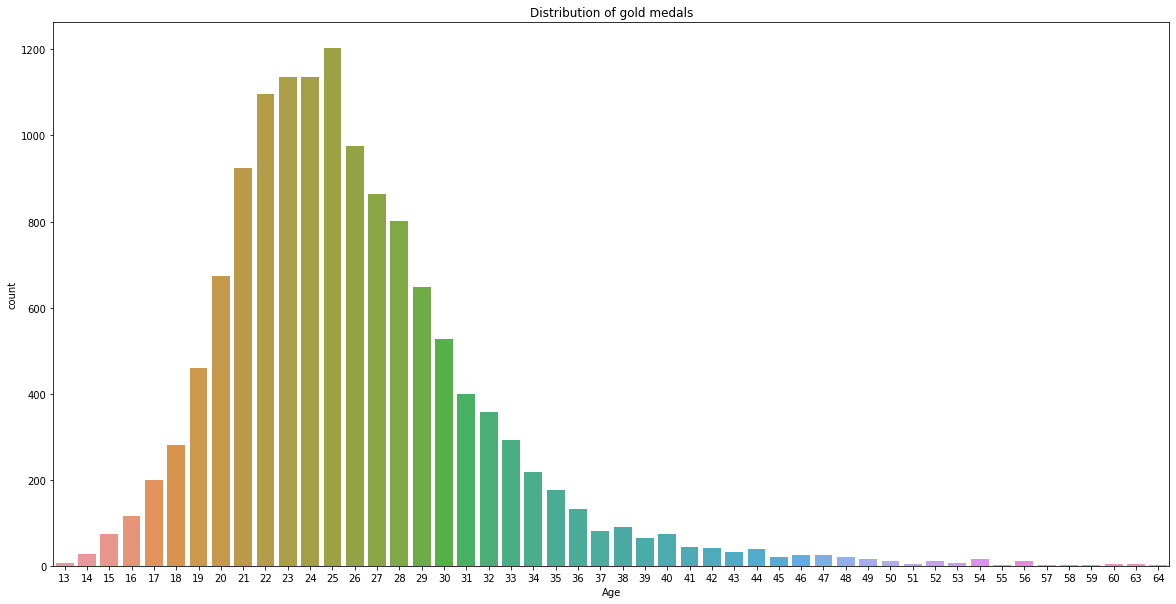

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Distribution of gold medals')
sns.countplot(gold_medal['Age'])

Athletes having age more than 50.

In [ ]:
print(gold_medal['Name'][gold_medal['Age']>50])
print("\n The no of athletes whose age is more than 50 is  : ",gold_medal['Name'][gold_medal['Age']>50].count())

5072             Derek Swithin Allhusen
7949                 Johan August Anker
13366        Nikolaus "Klaus" Balkenhol
13368        Nikolaus "Klaus" Balkenhol
24774     Gustaf Adolf Boltenstern, Jr.
                      ...              
259774          Robert W. Williams, Jr.
260331                    Walter Winans
260335                    Walter Winans
261524         Emily Woodruff (Smiley-)
264937         Mahonri Mackintosh Young
Name: Name, Length: 65, dtype: object

 The no of athletes whose age is more than 50 is  :  65
